In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


from keras import backend
 


Using TensorFlow backend.


In [2]:
from math import sqrt
from sklearn.metrics import mean_squared_error


In [3]:
train = pd.read_pickle("../../../modelo/armado_datos/train_completo_installs.pkl")

In [4]:
train["cantidad_nans"] = train.isnull().sum(axis=1)

In [5]:
train["cantidad_nans"].max()

103

In [6]:
train = train[train["cantidad_nans"] < 103]

In [7]:
len(train)

737575

In [8]:
train.fillna(0,inplace = True)

In [9]:
X, y = train.drop("target",axis = 1), train["target"]



In [10]:
y= y.values.reshape(-1,1)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=0)

In [12]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=104))
    regressor.add(Dense(units=1))
    regressor.compile(loss='mse', optimizer='adam', metrics=[rmse])
    return regressor

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=104, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

W0623 21:45:59.997907 140238992508736 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 21:46:01.007956 140238992508736 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 21:46:01.131473 140238992508736 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0623 21:46:01.192604 140238992508736 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                1260      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,373
Trainable params: 1,373
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse', optimizer='adam', metrics=['mse',rmse])

W0623 21:48:23.402250 140238992508736 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_test,y_test))

W0623 21:48:26.361136 140238992508736 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 590060 samples, validate on 147515 samples
Epoch 1/100
590060/590060 [==============================] - 13s 23us/step - loss: 0.0359 - mean_squared_error: 0.0359 - rmse: 0.1047 - val_loss: 0.0325 - val_mean_squared_error: 0.0325 - val_rmse: 0.0958
Epoch 2/100
590060/590060 [==============================] - 12s 20us/step - loss: 0.0326 - mean_squared_error: 0.0326 - rmse: 0.0961 - val_loss: 0.0327 - val_mean_squared_error: 0.0327 - val_rmse: 0.0898
Epoch 3/100
590060/590060 [==============================] - 12s 20us/step - loss: 0.0326 - mean_squared_error: 0.0326 - rmse: 0.0956 - val_loss: 0.0325 - val_mean_squared_error: 0.0325 - val_rmse: 0.0967
Epoch 4/100
590060/590060 [==============================] - 12s 20us/step - loss: 0.0325 - mean_squared_error: 0.0325 - rmse: 0.0952 - val_loss: 0.0325 - val_mean_squared_error: 0.0325 - val_rmse: 0.0909
Epoch 5/100
590060/590060 [==============================] - 12s 20us/step - loss: 0.0325 - mean_squared_error: 0.0325 - rmse: 0

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_rmse', 'loss', 'mean_squared_error', 'mean_absolute_error', 'rmse'])


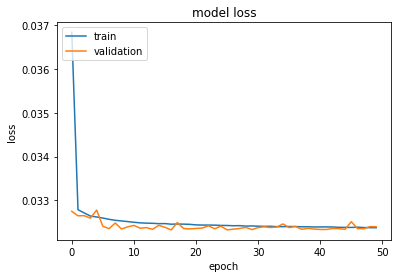

In [55]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [57]:
y_pred= model.predict(X_test)

In [58]:
pred = scaler_y.inverse_transform(y_pred) 

In [59]:
real = scaler_y.inverse_transform(y_test)

In [63]:
error = sqrt(mean_squared_error(pred,real))

print('RMSE value is:', error)

RMSE value is: 46782.89622217884


In [76]:
real2 = []
for valor in real:
    real2.append(valor[0])

In [78]:
pred2 = []
for valor in pred:
    pred2.append(valor[0])

In [82]:
error = sqrt(mean_squared_error(pred2,real2))

print('RMSE value is:', error)

RMSE value is: 46782.89622217884


In [80]:
pd.DataFrame({"pred":pred2,"real":real2})

,pred,real
0,254071.625000,259200.000
1,250365.828125,259200.000
2,250677.875000,259200.000
3,254244.421875,259200.000
4,130438.468750,6885.802
5,253830.453125,259200.000
6,253495.984375,259200.000
7,251706.750000,259200.000
8,126759.046875,58330.013
9,253883.453125,259200.000


----

### Auctions

In [3]:
train = pd.read_pickle("../../../modelo/armado_datos/train_completo_auctions.pkl")

In [4]:
len(train)

1286041

In [5]:
train.fillna(0,inplace = True)

In [7]:
X, y = train.drop("target",axis = 1), train["target"]



In [ ]:
y= y.values.reshape(-1,1)


In [10]:
scaler_x = MinMaxScaler()


In [11]:
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)


MemoryError: 

In [ ]:
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=0)

In [12]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=104))
    regressor.add(Dense(units=1))
    regressor.compile(loss='mse', optimizer='adam', metrics=[rmse])
    return regressor

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=103, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

W0623 20:49:21.068512 139911943796544 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 20:49:23.196177 139911943796544 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 20:49:23.479867 139911943796544 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0623 20:49:23.740615 139911943796544 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                1260      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,373
Trainable params: 1,373
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse', optimizer='adam', metrics=['mse',rmse])

W0623 20:51:50.858865 139911943796544 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=50,  verbose=1, validation_data=(X_test,y_test))

W0623 20:52:18.733414 139911943796544 deprecation_wrapper.py:119] From /home/pelozo/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 590060 samples, validate on 147515 samples
Epoch 1/10
590060/590060 [==============================] - 14s 24us/step - loss: 0.0400 - mean_squared_error: 0.0400 - rmse: 0.1079 - val_loss: 0.0326 - val_mean_squared_error: 0.0326 - val_rmse: 0.0947
Epoch 2/10
590060/590060 [==============================] - 11s 19us/step - loss: 0.0327 - mean_squared_error: 0.0327 - rmse: 0.0960 - val_loss: 0.0326 - val_mean_squared_error: 0.0326 - val_rmse: 0.0914
Epoch 3/10
590060/590060 [==============================] - 11s 19us/step - loss: 0.0326 - mean_squared_error: 0.0326 - rmse: 0.0957 - val_loss: 0.0326 - val_mean_squared_error: 0.0326 - val_rmse: 0.0943
Epoch 4/10
590060/590060 [==============================] - 12s 20us/step - loss: 0.0326 - mean_squared_error: 0.0326 - rmse: 0.0954 - val_loss: 0.0325 - val_mean_squared_error: 0.0325 - val_rmse: 0.0966
Epoch 5/10
590060/590060 [==============================] - 13s 21us/step - loss: 0.0325 - mean_squared_error: 0.0325 - rmse: 0.0952

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_rmse', 'loss', 'mean_squared_error', 'mean_absolute_error', 'rmse'])


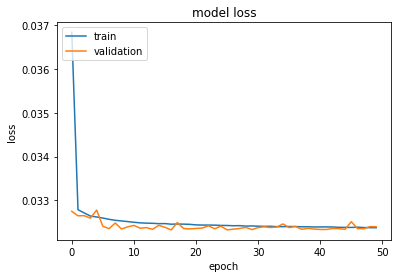

In [55]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [57]:
y_pred= model.predict(X_test)

In [58]:
pred = scaler_y.inverse_transform(y_pred) 

In [59]:
real = scaler_y.inverse_transform(y_test)

In [63]:
error = sqrt(mean_squared_error(pred,real))

print('RMSE value is:', error)

RMSE value is: 46782.89622217884


In [76]:
real2 = []
for valor in real:
    real2.append(valor[0])

In [78]:
pred2 = []
for valor in pred:
    pred2.append(valor[0])

In [82]:
error = sqrt(mean_squared_error(pred2,real2))

print('RMSE value is:', error)

RMSE value is: 46782.89622217884


In [80]:
pd.DataFrame({"pred":pred2,"real":real2})

,pred,real
0,254071.625000,259200.000
1,250365.828125,259200.000
2,250677.875000,259200.000
3,254244.421875,259200.000
4,130438.468750,6885.802
5,253830.453125,259200.000
6,253495.984375,259200.000
7,251706.750000,259200.000
8,126759.046875,58330.013
9,253883.453125,259200.000
